# Model

### Authors:
- Ana Farinha | 20211514
- Ana Reis | 20211631
- Beatriz Barreto | 20211547

### Introduction

Clustering is a machine learning technique used to group similar data points together based on their common caractheristics.It allows us to discover patterns, structures, and relationships within a dataset without any predefined labels or target variables.

In this notebook we tried to use different clustering algorithms to obtain a good customer segmentation for the dataset that we explored on EDA. We ended up using DBSCAN, Mean Shift, K-Means, Bisecting K-Means and Hierarchical Clustering.

The choice of which solution to use on the rest of the project was left for the next notebook titled '3_Clusters'.

## 1. Import Libraries and Utilities

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth, BisectingKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Import utilities
from utils import *
from visualizations import *

## 2. Import Dataset

In [3]:
# Import dataset
cust_info = data_load('.\\cust_data.csv')

In [4]:
# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

In [5]:
cust_info

,customer_name,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,age,education,female,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,1999-09-10 15:11:00,0,0,0,2,91.0,20.0,22,22.0,...,0.192154,2017,NaN,38.754263,-9.163397,23,HS,1,1545.0,0
19330,Donald Robertson,1981-06-26 22:58:00,1,0,0,2,197.0,5958.0,21,20.0,...,0.098647,2015,NaN,38.777761,-9.156197,41,HS,0,10219.0,1
2272,Phd. Felicia Bradshaw,1987-01-31 09:08:00,1,1,0,20,397.0,20.0,9,310.0,...,0.497251,2008,NaN,38.785329,-9.127113,36,Phd.,1,1753.0,2
25288,Emma Williams,1942-06-17 00:02:00,3,4,1,2,5282.0,237.0,12,499.0,...,0.206713,2010,NaN,38.744086,-9.156589,80,HS,1,11195.0,7
12829,Hilda Huerta,1999-01-01 00:00:00,0,0,0,2,82.0,22.0,21,9.0,...,0.200625,2015,NaN,38.756024,-9.162970,24,HS,1,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Phd. Karen Watts,1974-11-01 05:26:00,0,0,1,2,209.0,5474.0,20,18.0,...,0.096366,2008,935162.0,38.734446,-9.171911,48,Phd.,1,9730.0,0
26447,Curtis Thompson,1986-02-21 11:27:00,0,0,0,3,185.0,1066.0,15,267.0,...,0.118998,2014,NaN,38.767070,-9.144301,37,HS,0,2416.0,0
182,Richard Carter,2000-01-01 00:00:00,0,0,0,2,83.0,23.0,23,23.0,...,0.199432,2016,953891.0,38.728487,-9.164140,23,HS,0,1491.0,0


In [6]:
num_cust_info = cust_info.loc[:,(cust_info.dtypes != 'object') == True]
num_cust_info = num_cust_info.drop([ 'loyalty_card_number', 'latitude', 'longitude'], axis=1)


In [7]:
#Checking the variance of our variables
num_cust_info.var()

kids_home                                  1.523044e+00
teens_home                                 8.326985e-01
number_complaints                          6.994746e-01
distinct_stores_visited                    4.239954e+01
lifetime_spend_groceries                   2.788598e+07
lifetime_spend_electronics                 3.081304e+06
typical_hour                               3.168278e+01
lifetime_spend_vegetables                  2.321440e+05
lifetime_spend_nonalcohol_drinks           2.463500e+05
lifetime_spend_alcohol_drinks              5.578772e+04
lifetime_spend_meat                        3.311454e+05
lifetime_spend_fish                        9.142948e+06
lifetime_spend_hygiene                     2.840832e+04
lifetime_spend_videogames                  5.099486e+05
lifetime_total_distinct_products           2.027703e+06
percentage_of_products_bought_promotion    2.114329e-02
year_first_transaction                     2.492405e+01
age                                        2.988

None of variables have variance equal to 0 so we kept all of the variables.

In [8]:
num_cust_info_nb = num_cust_info.loc[:,(cust_info.dtypes != 'object') == True]
num_cust_info_nb = num_cust_info.drop([ 'female'], axis=1)

We decided to create a new dataframe without the binary variable 'female'.

## 3. Data Scaling and Normalization

In [9]:
scaler = StandardScaler()
# Here, we are using fit_transform, by fitting and
# immediately transforming the data into the scaled values
scaled_data = scaler.fit_transform(num_cust_info)
scaled_data_nb = scaler.fit_transform(num_cust_info_nb)

## 4. DBSCAN

In [10]:
cust_info['dbscan_cluster_1'] = DBSCAN(
    eps=2, min_samples=200
    ).fit_predict(scaled_data)

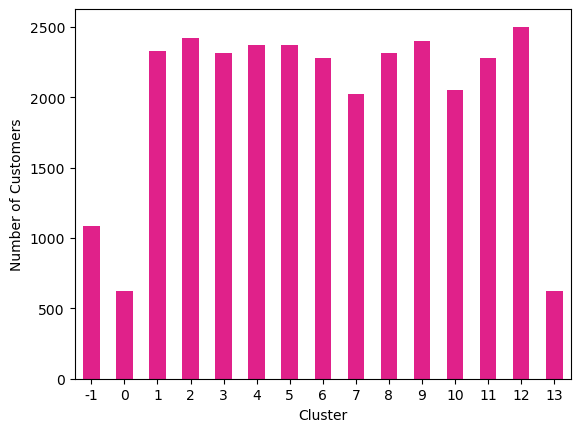

In [11]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = cust_info.groupby(['dbscan_cluster_1']).size()
ax = cluster_counts.plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [12]:
cust_info['dbscan_cluster_2'] = DBSCAN(
    eps=3, min_samples=200
    ).fit_predict(scaled_data)

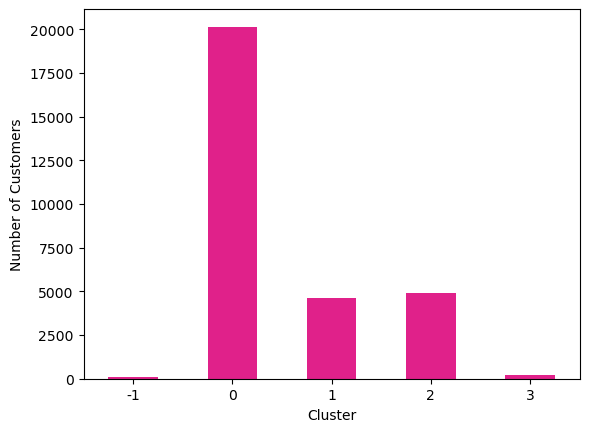

In [13]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = cust_info.groupby(['dbscan_cluster_2']).size()
ax = cluster_counts.plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [14]:
cust_info['dbscan_cluster_nb_1'] = DBSCAN(
    eps=2, min_samples=200
    ).fit_predict(scaled_data_nb)

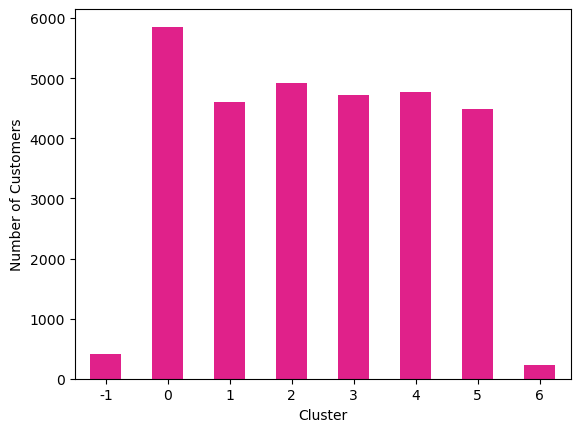

In [15]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = cust_info.groupby(['dbscan_cluster_nb_1']).size()
ax = cluster_counts.plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [16]:
cust_info['dbscan_cluster_nb_2'] = DBSCAN(
    eps=3, min_samples=200
    ).fit_predict(scaled_data_nb)

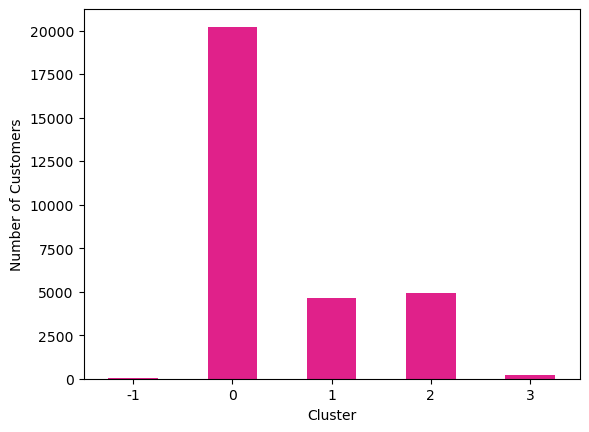

In [17]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = cust_info.groupby(['dbscan_cluster_nb_2']).size()
ax = cluster_counts.plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

Analysing these cases and taking into consideration that we tried it more times with different values for the parameters, we can conclude that the DBSCAN is not a good model for our dataset.

Droping the variables 'dbscan_cluster_1', 'dbscan_cluster_2', 'dbscan_cluster_nb_1' and 'dbscan_cluster_nb_2' since they are not relevant for the rest of our work.

In [18]:
cust_info = cust_info.drop([ 'dbscan_cluster_1', 'dbscan_cluster_2',
                                    'dbscan_cluster_nb_1', 'dbscan_cluster_nb_2'], axis=1)

## 5. Mean Shift

In [19]:
MeanShift = MeanShift(bin_seeding = True).fit(scaled_data)
cust_info['cluster_meanshift'] = MeanShift.predict(scaled_data)
cust_info['cluster_meanshift'].value_counts()

0    29774
1      224
Name: cluster_meanshift, dtype: int64

Analysing this case and taking into consideration that we tried it more times with different values for the parameters, we can conclude that the Mean Shift is not a good model for our dataset since it only gave us 2 clusters, one of them with almost all of our observations.

## 6. K-Means

### Find the ideal number of clusters

In [20]:
dispersion = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

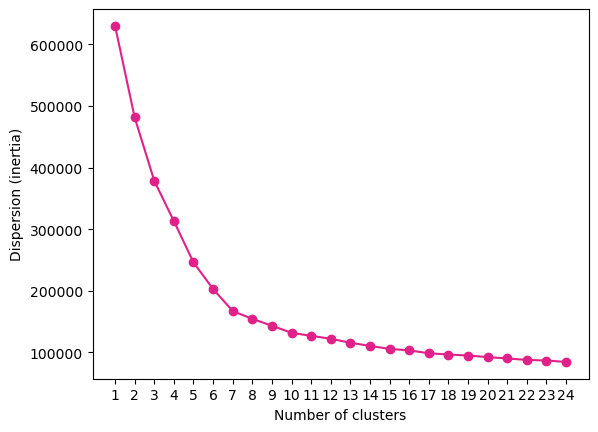

In [21]:
plt.plot(range(1, 25), dispersion, marker='o', color = '#e0218a')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

In [22]:
dispersion_nb = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data_nb)
    dispersion_nb.append(kmeans.inertia_)

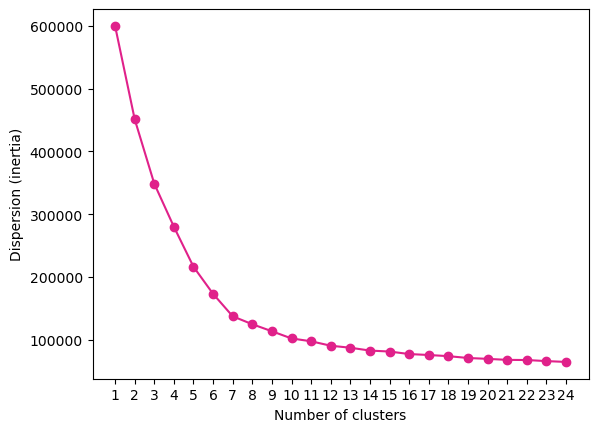

In [23]:
plt.plot(range(1, 25), dispersion_nb, marker='o', color = '#e0218a')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

Analysing the graphs above, we are able to conclude that 7 is a good number of clusters for our dataset.

### K-Means using all the numerical variables

In [24]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(scaled_data)
cust_info['cluster_kmeans'] = kmeans.predict(scaled_data)

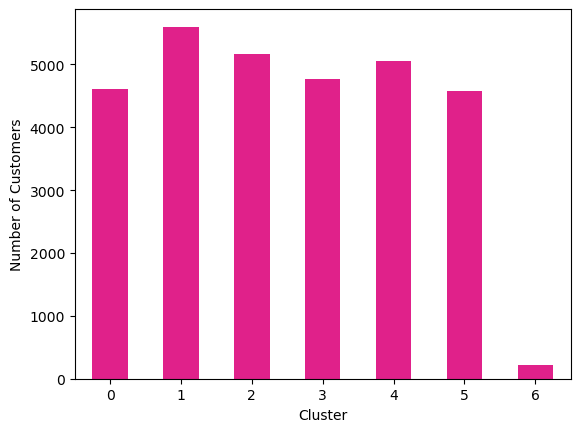

In [25]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = cust_info.groupby(['cluster_kmeans']).size()
ax = cluster_counts.plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()


we obtained 6 clusters with similar number of observations and one with very few observations.

In [26]:
# Calculate mean for each variable
mean_values = cust_info.mean()

# Transpose grouped mean values
grouped_means = cust_info.groupby(['cluster_kmeans']).mean().T

# Add mean of every variable to the output
grouped_means['mean of variable'] = mean_values

grouped_means

cluster_kmeans,0,1,2,3,4,5,6,mean of variable
kids_home,0.689588,0.247321,0.974840,0.997484,1.128783,3.135141,0.000000,1.146776
teens_home,0.068547,0.175893,0.092510,0.271545,0.767359,1.844522,0.000000,0.512968
number_complaints,0.500000,0.200357,1.193536,1.550430,0.330564,0.934179,0.000000,0.764418
distinct_stores_visited,1.992625,2.422679,19.097155,7.994338,1.994857,3.008966,1.000000,6.121108
lifetime_spend_groceries,200.406291,3158.401964,297.990323,14982.854896,969.428487,4997.612290,2.701888,3978.899334
lifetime_spend_electronics,4999.557484,628.382857,19.518870,199.985322,83.301682,199.940083,1.149657,965.303071
typical_hour,20.951844,18.146607,9.041030,11.914447,9.747774,17.394708,0.000000,14.353124
lifetime_spend_vegetables,20.033623,281.938571,290.701955,799.374292,1421.770129,602.060573,2.124256,564.245311
lifetime_spend_nonalcohol_drinks,1500.946855,327.779821,290.884072,900.710841,37.198022,901.055762,2.302029,628.791908
lifetime_spend_alcohol_drinks,499.866161,481.201429,204.452874,599.027679,34.948961,500.935054,2.704794,379.369654


The table above give us the mean value of each variable in each cluster and the mean of the variable in the dataset. This is useful to gain initial insights about our clusters. For example, we can see that we have a cluster where no one has dependents at home.

### K-Means excluding the binary variables

In [27]:
kmeans_nb = KMeans(n_clusters=7, random_state=0).fit(scaled_data_nb)
cust_info['cluster_kmeans_nb'] = kmeans_nb.predict(scaled_data_nb)

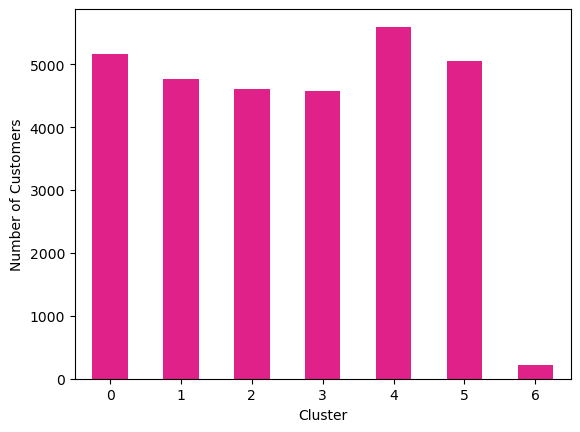

In [28]:
# Create a bar chart of the number of customers in each cluster
cust_info.groupby(['cluster_kmeans_nb']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

Just like in the other solution, we obtained 6 clusters with similar number of observations and one with very few observations.

In [29]:
# Transpose grouped mean values
grouped_means_nb = cust_info.groupby(['cluster_kmeans_nb']).mean().T

# Add mean of every variable to the output
grouped_means_nb['mean of variable'] = mean_values

grouped_means_nb

cluster_kmeans_nb,0,1,2,3,4,5,6,mean of variable
kids_home,0.975029,0.997484,0.689588,3.135141,0.247544,1.128139,0.000000,1.146776
teens_home,0.092334,0.271545,0.068547,1.844522,0.176103,0.767056,0.000000,0.512968
number_complaints,1.193380,1.550430,0.500000,0.934179,0.201107,0.330038,0.000000,0.764418
distinct_stores_visited,19.100658,7.994338,1.992625,3.008966,2.422575,1.994859,1.000000,6.121108
lifetime_spend_groceries,298.016647,14982.854896,200.406291,4997.612290,3158.441865,969.657504,2.701888,3978.899334
lifetime_spend_electronics,19.520325,199.985322,4999.557484,199.940083,628.294695,83.492980,1.149657,965.303071
typical_hour,9.041038,11.914447,20.951844,17.394708,18.150563,9.744908,0.000000,14.353124
lifetime_spend_vegetables,290.740031,799.374292,20.033623,602.060573,281.876585,1421.350801,2.124256,564.245311
lifetime_spend_nonalcohol_drinks,290.919473,900.710841,1500.946855,901.055762,327.694053,37.364445,2.302029,628.791908
lifetime_spend_alcohol_drinks,204.421216,599.027679,499.866161,500.935054,481.240936,35.059324,2.704794,379.369654


## 5. Bisecting K-Means Clustering

In [30]:
dispersion_bkm = []
for k in range(1, 25):
    bisect_kmeans = BisectingKMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion_bkm.append(bisect_kmeans.inertia_)

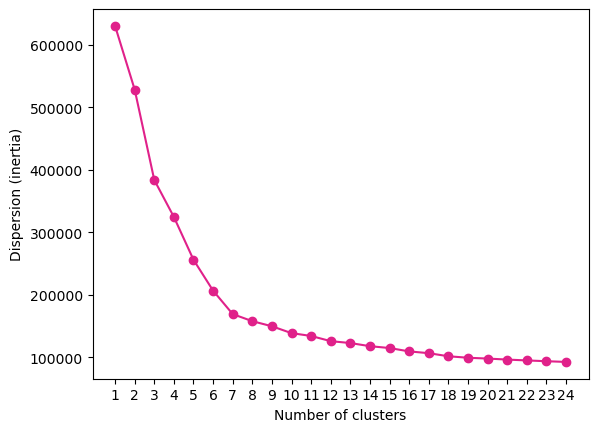

In [31]:
plt.plot(range(1, 25), dispersion_bkm, marker='o', color = '#e0218a')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

We should divide our dataset in at least 7 clusters

In [32]:
bisect_kmeans = BisectingKMeans(n_clusters=7, random_state=0).fit(scaled_data)
cust_info['cluster_bisect_kmeans'] = bisect_kmeans.predict(scaled_data)

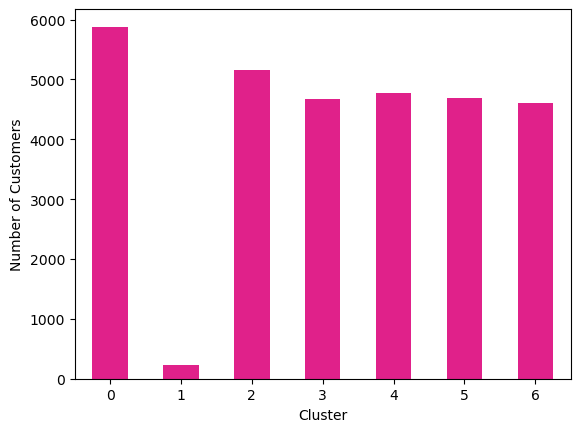

In [33]:
# Create a bar chart of the number of customers in each cluster
cust_info.groupby(['cluster_bisect_kmeans']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

The solution is very similar to the others since we have 6 clusters with similar number of customers and one with very few customers.

In [34]:
# Transpose grouped mean values
grouped_means_bk = cust_info.groupby(['cluster_bisect_kmeans']).mean().T

# Add mean of every variable to the output
grouped_means_bk['mean of variable'] = mean_values

grouped_means_bk

cluster_bisect_kmeans,0,1,2,3,4,5,6,mean of variable
kids_home,1.052211,0.000000,0.974588,3.080548,0.995814,0.186419,0.689588,1.146776
teens_home,0.743197,0.000000,0.090204,1.810840,0.271034,0.104420,0.068547,0.512968
number_complaints,0.379252,0.000000,1.190495,0.930591,1.548347,0.110399,0.500000,0.764418
distinct_stores_visited,1.995918,1.000000,19.139282,3.008355,7.984512,2.481102,1.992625,6.121108
lifetime_spend_groceries,939.620578,2.701888,298.249467,5004.278278,14966.227501,3524.128337,200.406291,3978.899334
lifetime_spend_electronics,143.987585,1.149657,19.540640,202.607112,200.739431,652.714499,4999.557484,965.303071
typical_hour,10.005272,0.000000,9.040349,17.409169,11.923399,19.284006,20.951844,14.353124
lifetime_spend_vegetables,1263.484864,2.124256,291.144520,601.406812,798.918376,273.042921,20.033623,564.245311
lifetime_spend_nonalcohol_drinks,71.856463,2.302029,291.319884,899.001928,900.274383,324.641683,1500.946855,628.791908
lifetime_spend_alcohol_drinks,71.878401,2.704794,204.488458,500.328620,598.788196,512.922272,499.866161,379.369654


We can observe that we have the same cluster with no dependents that we found in the other solutions.

## 6. Hierarchical Clustering

### Single Linkage Hierarchical

In [35]:
minimum_hierarchical = AgglomerativeClustering(
    linkage='single', distance_threshold=0, n_clusters=None
    ).fit(scaled_data)

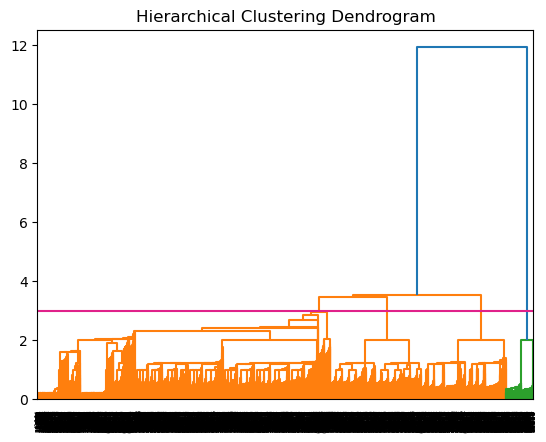

In [36]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(minimum_hierarchical, truncate_mode="level", p=50)
plt.axhline(y =3 , color = '#e0218a', linestyle = '-')
plt.show()

In [37]:
cust_info['cluster_single'] = AgglomerativeClustering(
    linkage='single', n_clusters=7
    ).fit_predict(scaled_data)

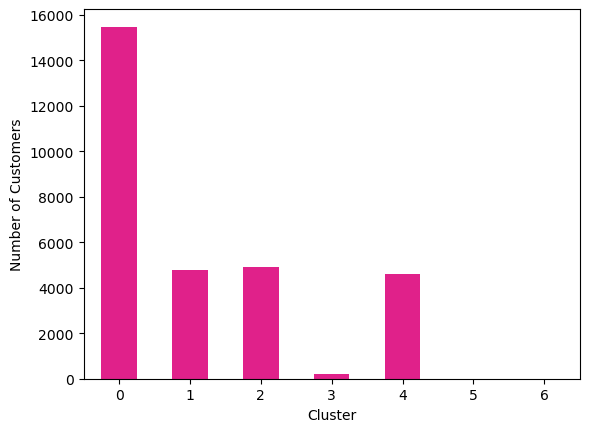

In [38]:
# Create a bar chart of the number of customers in each cluster
cust_info.groupby(['cluster_single']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

Here we have a segment with the vast majority of the observations and 3 segments with almost no customers. Because of that, we don't think this is a good clustering solution for our data.

Looking at the graph above, we are able to see that minimum linkage isn't a very good cluster solution since it groups the majority of the observations in the same cluster. Clusters 3, 4 and 5 only have one observation.

In [39]:
# Transpose grouped mean values
grouped_means_single = cust_info.groupby(['cluster_single']).mean().T

# Add mean of every variable to the output
grouped_means_single['mean of variable'] = mean_values

grouped_means_single

cluster_single,0,1,2,3,4,5,6,mean of variable
kids_home,1.391549,0.997901,1.000203,0.000000,0.689588,6.000000,3.000000,1.146776
teens_home,0.866899,0.271620,0.069904,0.000000,0.068547,8.000000,9.000000,0.512968
number_complaints,0.533824,1.551008,1.010567,0.000000,0.500000,1.000000,1.000000,0.764418
distinct_stores_visited,2.433676,7.999580,20.001829,1.000000,1.992625,4.000000,2.000000,6.121108
lifetime_spend_groceries,2940.219745,14993.307935,302.959764,2.701888,200.406291,4623.000000,5156.000000,3978.899334
lifetime_spend_electronics,313.851845,199.970403,20.000000,1.149657,4999.557484,192.000000,188.000000,965.303071
typical_hour,15.049880,11.914568,8.991668,0.000000,20.951844,23.000000,18.000000,14.353124
lifetime_spend_vegetables,745.983718,799.560034,300.231863,2.124256,20.033623,678.000000,587.000000,564.245311
lifetime_spend_nonalcohol_drinks,398.725399,900.786104,300.431823,2.302029,1500.946855,930.000000,846.000000,628.791908
lifetime_spend_alcohol_drinks,338.372165,599.145886,199.776671,2.704794,499.866161,509.000000,415.000000,379.369654


### Ward Hierarchical

In [40]:
agg_clust = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_data)

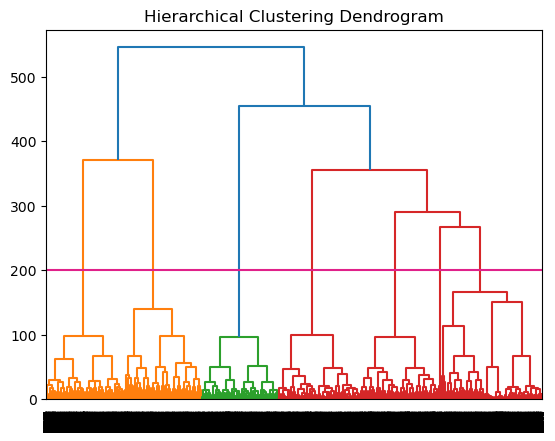

In [41]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 200, color='#e0218a', linestyle = '-')
plt.show()

In [42]:
cust_info['cluster_ward'] = AgglomerativeClustering(
    linkage='ward', n_clusters=7
    ).fit_predict(scaled_data)

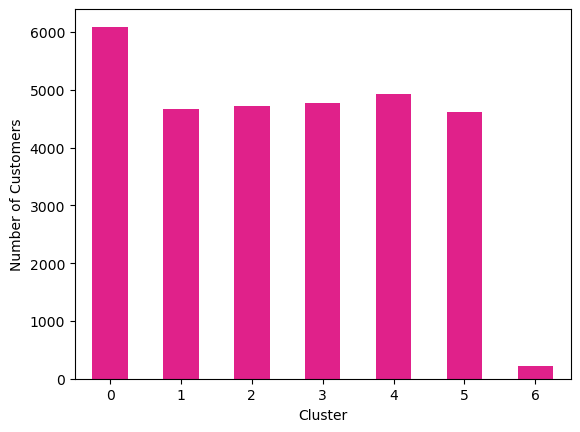

In [44]:
# Create a bar chart of the number of customers in each cluster
cust_info.groupby(['cluster_ward']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

This graph is very similar to the other k-means solutions, so we think it might be a good solution to further explore.

In [43]:
# Transpose grouped mean values
grouped_means_ward = cust_info.groupby(['cluster_ward']).mean().T

# Add mean of every variable to the output
grouped_means_ward['mean of variable'] = mean_values

grouped_means_ward

cluster_ward,0,1,2,3,4,5,6,mean of variable
kids_home,0.278654,3.078852,1.160525,0.997901,1.000203,0.689588,0.000000,1.146776
teens_home,0.219376,1.811656,0.771495,0.271620,0.069904,0.068547,0.000000,0.512968
number_complaints,0.400493,0.933576,0.310885,1.551008,1.010567,0.500000,0.000000,0.764418
distinct_stores_visited,2.330378,3.007285,2.000212,7.999580,20.001829,1.992625,1.000000,6.121108
lifetime_spend_groceries,2870.941708,4997.018856,997.551461,14993.307935,302.959764,200.406291,2.701888,3978.899334
lifetime_spend_electronics,605.609360,200.006642,50.036637,199.970403,20.000000,4999.557484,1.149657,965.303071
typical_hour,17.173563,17.401971,9.988564,11.914568,8.991668,20.951844,0.000000,14.353124
lifetime_spend_vegetables,271.772085,602.098779,1499.739094,799.560034,300.231863,20.033623,2.124256,564.245311
lifetime_spend_nonalcohol_drinks,307.784401,900.787872,20.005294,900.786104,300.431823,1500.946855,2.302029,628.791908
lifetime_spend_alcohol_drinks,460.626108,500.900364,20.117535,599.145886,199.776671,499.866161,2.704794,379.369654


The graph above shows that we have 6 clusters with similar number of observations and one with very few, just like in the k-means solutions.

## 6. Comparing Solutions

### Comparing the k-means

In [45]:
pd.DataFrame(
    confusion_matrix(cust_info.cluster_kmeans, cust_info.cluster_kmeans_nb),
    index = ['K-means {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['K-means_nb {} Cluster'.format(i) for i in np.arange(0,7)],
)

,K-means_nb 0 Cluster,K-means_nb 1 Cluster,K-means_nb 2 Cluster,K-means_nb 3 Cluster,K-means_nb 4 Cluster,K-means_nb 5 Cluster,K-means_nb 6 Cluster
K-means 0 Cluster,0,0,4610,0,0,0,0
K-means 1 Cluster,0,0,0,0,5597,3,0
K-means 2 Cluster,5166,0,0,0,1,0,0
K-means 3 Cluster,0,4769,0,0,0,0,0
K-means 4 Cluster,0,0,0,0,1,5054,0
K-means 5 Cluster,0,0,0,4573,0,0,0
K-means 6 Cluster,0,0,0,0,0,0,224


The k-means with or without the binary variable don't show significant differences in the solutions. So we considered that the variable 'female' has a low impact on our clusters.

### Comparing the k-mean with the bisecting k-means

In [46]:
# Checking the Bisecting K-Means vs. K-Means
pd.DataFrame(
    confusion_matrix(cust_info.cluster_kmeans, cust_info.cluster_bisect_kmeans),
    index = ['K-means {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['Bisecting K-Means {} Cluster'.format(i) for i in np.arange(0,7)],
)

,Bisecting K-Means 0 Cluster,Bisecting K-Means 1 Cluster,Bisecting K-Means 2 Cluster,Bisecting K-Means 3 Cluster,Bisecting K-Means 4 Cluster,Bisecting K-Means 5 Cluster,Bisecting K-Means 6 Cluster
K-means 0 Cluster,0,0,0,0,0,0,4610
K-means 1 Cluster,804,0,9,94,10,4683,0
K-means 2 Cluster,21,0,5146,0,0,0,0
K-means 3 Cluster,0,0,0,1,4768,0,0
K-means 4 Cluster,5055,0,0,0,0,0,0
K-means 5 Cluster,0,0,0,4573,0,0,0
K-means 6 Cluster,0,224,0,0,0,0,0


The solution of the Bisecting k-means and the k-means are very similar.

### Comparing the ward hierarchical with the minimum hierarchical

In [47]:
#Starting with the Ward vs. Single:
pd.DataFrame(
    confusion_matrix(cust_info.cluster_single, cust_info.cluster_ward),
    index = ['Single {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['Ward {} Cluster'.format(i) for i in np.arange(0,7)],
)

,Ward 0 Cluster,Ward 1 Cluster,Ward 2 Cluster,Ward 3 Cluster,Ward 4 Cluster,Ward 5 Cluster,Ward 6 Cluster
Single 0 Cluster,6090,4665,4722,0,0,0,0
Single 1 Cluster,0,0,0,4764,0,0,0
Single 2 Cluster,0,0,0,0,4921,0,0
Single 3 Cluster,0,0,0,0,0,0,224
Single 4 Cluster,0,0,0,0,0,4610,0
Single 5 Cluster,0,1,0,0,0,0,0
Single 6 Cluster,0,1,0,0,0,0,0


Looking at the table above, we are able to see that when using the single linkage method almost all of the observations are classified as the same cluster. Cluster 0 of single linkage has the observations of 4 clusters in the ward. Taking this into consideration and the other observations made above, we decided to only compare the results of the Ward with our solution of K-means.

### Comparing the ward hierarchical with the k-means

In [48]:
# Checking the Ward vs. K-Means
pd.DataFrame(
    confusion_matrix(cust_info.cluster_kmeans, cust_info.cluster_ward),
    index = ['K-means {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['Ward {} Cluster'.format(i) for i in np.arange(0,7)],
)

,Ward 0 Cluster,Ward 1 Cluster,Ward 2 Cluster,Ward 3 Cluster,Ward 4 Cluster,Ward 5 Cluster,Ward 6 Cluster
K-means 0 Cluster,0,0,0,0,0,4610,0
K-means 1 Cluster,5511,89,0,0,0,0,0
K-means 2 Cluster,246,0,0,0,4921,0,0
K-means 3 Cluster,0,5,0,4764,0,0,0
K-means 4 Cluster,333,0,4722,0,0,0,0
K-means 5 Cluster,0,4573,0,0,0,0,0
K-means 6 Cluster,0,0,0,0,0,0,224


With this table we can see that, once again, the cluster with 224 observations is present on both solutions making us believe that the customers in this segments are truly a well defined group with very specific behaviours. The rest of the results are similar between solutions.

### Comparing the ward hierarchical with the bisecting k-means

In [49]:
# Checking the Ward vs. Bisecting K-Means
pd.DataFrame(
    confusion_matrix(cust_info.cluster_bisect_kmeans, cust_info.cluster_ward),
    index = ['Bisecting K-means {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['Ward {} Cluster'.format(i) for i in np.arange(0,7)],
)

,Ward 0 Cluster,Ward 1 Cluster,Ward 2 Cluster,Ward 3 Cluster,Ward 4 Cluster,Ward 5 Cluster,Ward 6 Cluster
Bisecting K-means 0 Cluster,1158,0,4722,0,0,0,0
Bisecting K-means 1 Cluster,0,0,0,0,0,0,224
Bisecting K-means 2 Cluster,234,0,0,0,4921,0,0
Bisecting K-means 3 Cluster,17,4651,0,0,0,0,0
Bisecting K-means 4 Cluster,5,9,0,4764,0,0,0
Bisecting K-means 5 Cluster,4676,7,0,0,0,0,0
Bisecting K-means 6 Cluster,0,0,0,0,0,4610,0


The solutions for these algorithms were similar. However, cluster 0 of the ward solution seems to have a significant number of observations that in the other solution belong to other clusters.

## 7. Export Datasets

In [51]:
cust_info.to_csv('cust_data_clusters.csv')